# 0.사전준비

In [1]:
!pip install xlwt
!pip install pandas
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#다운로드한 파일 압축풀기
 

In [3]:
# [PC/colab 통합]파일다운로드(기본) 및 압축파일 해제
!pip install gdown==4.5.1
# !pip install gdown==4.5.1
import gdown
import zipfile
print(gdown.__version__)
google_path = "https://drive.google.com/uc?id="
file_id = '1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH'
output_name = "2.data_edit.zip"
gdown.download(google_path+file_id,output_name,quiet=False)
fantasy_zip = zipfile.ZipFile("2.data_edit.zip")
fantasy_zip.extractall()
google_path = "https://drive.google.com/uc?id="
file_id = '1gkjNoNIx5vdBNVGH91NlIG4DL5obyAgQ'
output_name = "강의준비자료_COLAB용데이터.zip"
gdown.download(google_path+file_id,output_name,quiet=False)
fantasy_zip = zipfile.ZipFile("강의준비자료_COLAB용데이터.zip")
fantasy_zip.extractall()

# https://drive.google.com/file/d/1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH/view?usp=sharing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14949 sha256=3c88c03e8d29542c46de879a0fa61ee437c589cd294e3828084fa0be58bfa6c8
  Stored in directory: /root/.cache/pip/wheels/8d/df/71/846b2aa0fabaac2af23fbc5214eeaa55f0616e9d1a05187d72
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
4.4.0


Downloading...
From: https://drive.google.com/uc?id=1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH
To: /content/2.data_edit.zip
100%|██████████| 295k/295k [00:00<00:00, 51.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gkjNoNIx5vdBNVGH91NlIG4DL5obyAgQ
To: /content/강의준비자료_COLAB용데이터.zip
100%|██████████| 701k/701k [00:00<00:00, 110MB/s]


# 1. 현업적용코드보기
- 폴더안에 있는 엑셀파일 확인하기
- 각각의 엑셀파일 열어서 상태확인하기
- (1개단위)각각의 엑셀파일을 내가 원하는 구조로 변경하여 데이터로 저장unit만들기
- (반복문) 전체 엑셀파일을 내가 원하는 구조로 변경하여 하나의 데이터로 저장
- 정리된 데이터파일을 pivot 을 사용해서 제품별 정리된 내용을 분할하여 저장하기

In [ ]:
#1 필요한 라이브러리 설치하기
import pandas as pd
import os

#기초 폴더
bacic_folder = 'new_data2' #new_data 한글데이터입니다/ 하지만 코랩에서 압축해제시 한글파일이 문제가 있을 수 있음
#영어로 전환을 원할경우 'new_dats2' 로 바꿔줘야함

#2 엑셀취합자료의 자료 가져오기
file_list = os.listdir(f"./{bacic_folder}")
file_list_xls = []
for a in file_list:
    if ".xls" in a:
        file_list_xls.append(a)
file_list_xls

#3.각각의 엑셀파일을 편집후와 함께 저장한다.
data_unit_sum = pd.DataFrame()
for b in file_list_xls:
    df = pd.read_excel(f"./{bacic_folder}/"+b)
    df['나라'] = b.split("_")[1]
    data_unit = df[['나라','조사제품','제목','내용']]
    data_unit_sum = pd.concat([data_unit_sum, data_unit], axis = 0)
data_unit_sum.to_excel('combined_excel_221128.xlsx')

#4. 만들어진 파일을 기반으로 제품별로 구분하여 분할 저장하기
product_list = data_unit_sum['조사제품'].value_counts()
for d in dict(product_list):
    xls_name = data_unit_sum[data_unit_sum['조사제품']==d]
    xls_name.to_excel(f"{d}.xlsx")

# 2.Pandas 기본문법

In [4]:
#p_1판다스 라이브러리 설치
!pip install pandas
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 2-1.예제p_e_1. 엑셀다루기 원코드

In [5]:
#예제p_e_2.판다스를 배워야 하는 이유 예시1
df = pd.read_excel("excel_sample.xlsx")
df1 = df.transpose()
df1 = df1.rename(columns=df1.iloc[0])
df1 = df1.drop(df1.index[0])
df1.to_excel("excel_sample_trans.xlsx")
df2 = df
df2.index = df2['Unnamed: 0'].values
df2.drop(['Unnamed: 0'],axis=1,inplace=True)
df2

,a,b,c
가,1,10,100
나,1000,10000,100000
다,1000000,10000000,100000000


In [6]:
#예제p_e_2.판다스를 배워야 하는 이유 예시1-1 * 10?
import os
file_list = os.listdir('row-columns_trans/')
for file in file_list:
    df = pd.read_excel(f"row-columns_trans/{file}")
    df1 = df.transpose()
    df1 = df1.rename(columns=df1.iloc[0])
    df1 = df1.drop(df1.index[0])
    df1.to_excel(f"row-columns_trans/rctrans_{file}")
    df2 = df
    df2.index = df2['Unnamed: 0'].values
    df2.drop(['Unnamed: 0'],axis=1,inplace=True)
    df2
    display(df2)

,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


,Unnamed: 0.1,a,b,c
0,가,1,10,100
1,나,1000,10000,100000
2,다,1000000,10000000,100000000


In [7]:
#예제p_e_2.판다스를 배워야 하는 이유 예시2
import pandas as pd

df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
df2 = pd.DataFrame({'month': [3, 5, 11, 10],
                   'year': [2015, 2016, 2017, 2018],
                   'sale': [12, 20, 34, 41]})

df.transpose()
pd.concat([df,df2])
df = df.transpose()
display(df)
df2 = df2.transpose()
display(df2)
data = pd.concat([df,df2])
display(data)


,0,1,2,3
month,1,4,7,10
year,2012,2014,2013,2014
sale,55,40,84,31


,0,1,2,3
month,3,5,11,10
year,2015,2016,2017,2018
sale,12,20,34,41


,0,1,2,3
month,1,4,7,10
year,2012,2014,2013,2014
sale,55,40,84,31
month,3,5,11,10
year,2015,2016,2017,2018
sale,12,20,34,41


## Load Dataset

In [8]:
data = pd.read_csv("test_df.csv")
data = data.set_index("행번")
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실동
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,잠실동
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [ ]:
#엑셀에 대체제가 될 수 있다.
#엑셀도 판다스도 모두 쓰게 될 것이다.
#pandas 는 대용량 데이터에 최적화 되어있다.
# PANDAS는 python 을 통한 분석이후에 넥스트도 가능하다. Dashboard 만들고 결과를 볼수도 있습니다.

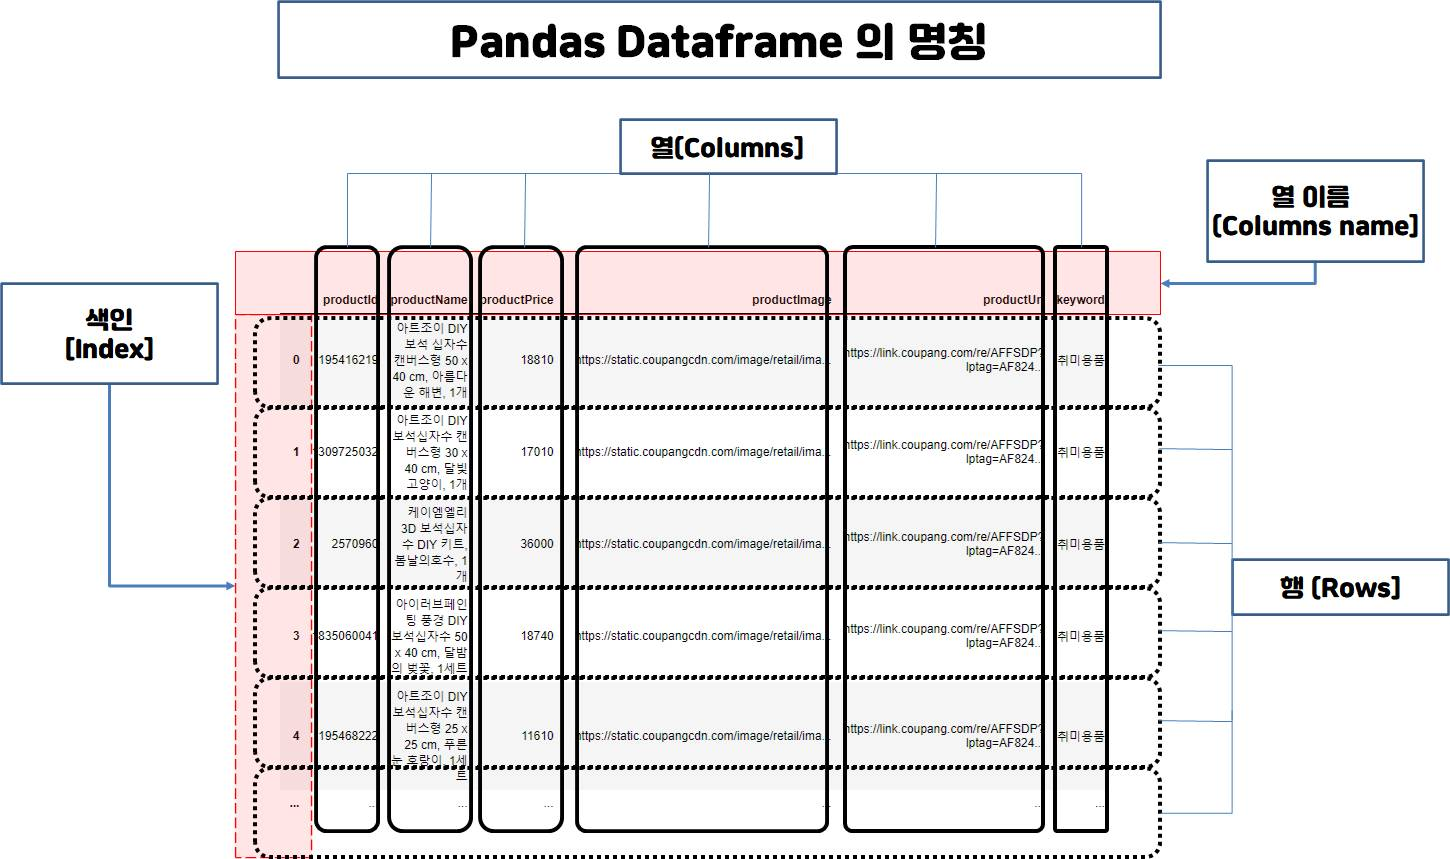![title](../picture/bhyunco_pandas_nameset.jpg)

In [9]:
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실동
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,잠실동
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [10]:
data.index
#행 소괄호를 넣지 않는다.

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='행번')

In [11]:
#write your code

In [12]:
data.columns
#열 소괄호를 넣지 않는다.

Index(['이름', '조사일', '몸무게', '단위', '트레이너', '지점명'], dtype='object')

In [ ]:
#write your code

In [13]:

data.shape
#형태 소괄호를 넣지 않는다.

(9, 6)

In [ ]:
#write your code

In [14]:
data.head()

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실동
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,잠실동
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실


In [ ]:
#write your code

In [15]:
data.tail()

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [16]:
data.head(2)

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실동
2,비현코,2019-03-01,68.0,kg,jason,잠실


In [ ]:
#write your code

In [17]:
data.head(3)

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실동
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,잠실동


In [ ]:
#write your code

In [18]:
data.head(10)

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실동
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,잠실동
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [19]:
#write your code

In [20]:
data.tail(2)

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [21]:
#write your code

In [22]:
data.tail(3)

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [23]:
#write your code

In [24]:
#소괄화를 쓰는 개념은 METHOD 를 사용할때 있는데,  소괄호를 넣지 않은 경우는 특이한 결과다

## 기본 연산

In [25]:
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실동
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,잠실동
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [26]:
#write your code

In [27]:
data["몸무게"].mean()

79.0

In [28]:
#write your code

In [29]:
data["몸무게"].min()

68.0

In [30]:
#write your code

In [31]:
data["몸무게"].max()

92.0

In [32]:
#write your code

In [33]:
data["몸무게"].sum()

474.0

In [34]:
#write your code

In [35]:
data["몸무게"].describe()
#기본 통계치

count     6.000000
mean     79.000000
std       9.879271
min      68.000000
25%      71.250000
50%      77.500000
75%      86.750000
max      92.000000
Name: 몸무게, dtype: float64

In [36]:
#write your code

In [37]:
data["지점명"] = data["지점명"].replace("잠실동","잠실")

# 중요함!

In [38]:
#write your code

In [39]:
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,잠실
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [40]:
#write your code

In [41]:
data["몸무게"].isnull()

행번
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8     True
9    False
Name: 몸무게, dtype: bool

In [ ]:
#write your code

In [43]:
data["몸무게"] = data["몸무게"].fillna(75.8)

In [44]:
#write your code

In [45]:
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,75.8,kg,jason,잠실
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,75.8,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,75.8,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [46]:
#write your code

In [47]:
data["몸무게"]

행번
1    70.0
2    68.0
3    75.8
4    80.0
5    75.0
6    75.8
7    89.0
8    75.8
9    92.0
Name: 몸무게, dtype: float64

In [ ]:
#write your code

In [48]:
data["몸무게(prev+1)"] = data["몸무게"].shift(+1)
data["몸무게(next-1)"] = data["몸무게"].shift(-1)

In [49]:
#write your code

In [50]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [ ]:
#write your code

In [51]:
data["조사일"]

행번
1    2019-01-01
2    2019-03-01
3    2019-06-01
4    2019-01-01
5    2019-03-01
6    2019-06-01
7    2019-01-01
8    2019-03-01
9    2019-06-01
Name: 조사일, dtype: object

In [ ]:
#write your code

In [ ]:
#dtype : object 라는 것이 파이썬에서는 객체(object)라는 단위로 메모리 위의 정보를 관리한다.

In [52]:
data["조사일"] = pd.to_datetime(data["조사일"])
# 측정일 자체를 일자로 고쳐주는 역할을 한다.

In [53]:
#write your code

In [54]:
data["조사일"].dt.year

행번
1    2019
2    2019
3    2019
4    2019
5    2019
6    2019
7    2019
8    2019
9    2019
Name: 조사일, dtype: int64

In [ ]:
#write your code

In [55]:
data["조사일"].dt.month
# dt 는 daytime의 약자이다

행번
1    1
2    3
3    6
4    1
5    3
6    6
7    1
8    3
9    6
Name: 조사일, dtype: int64

In [56]:
#write your code

In [57]:
data["조사일"].dt.day

행번
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: 조사일, dtype: int64

In [58]:
#write your code

## 행렬 검색

In [59]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [ ]:
#write your code

In [60]:
data1 = data.copy()

In [ ]:
#write your code

In [61]:
data1

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [62]:
#write your code

In [63]:
del data1["몸무게(next-1)"]

In [64]:
#write your code

In [65]:
data1

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8


In [66]:
#write your code

In [67]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [68]:
#write your code

In [69]:
data1["몸무게(prev)"] = data1["몸무게"].shift(+1)
data1["몸무게(next)"] = data1["몸무게"].shift(-1)

In [70]:
#write your code

In [71]:
data1

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN


In [72]:
#write your code

In [73]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [74]:
#write your code

In [75]:
data2 = data.copy()

In [76]:
#write your code

In [77]:
del data2["몸무게(prev+1)"]
del data2["몸무게(next-1)"]

In [78]:
#write your code

In [79]:
data2

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,75.8,kg,jason,잠실
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,75.8,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,강남
8,비사코,2019-03-01,75.8,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [80]:
#write your code

In [81]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [82]:
#write your code

In [83]:
data["몸무게"]
#컬럼을 하나 가지고 오고싶으면 1개

행번
1    70.0
2    68.0
3    75.8
4    80.0
5    75.0
6    75.8
7    89.0
8    75.8
9    92.0
Name: 몸무게, dtype: float64

In [ ]:
#write your code

In [ ]:
data[["이름","조사일","몸무게"]]
#컬럼을 2개 가지고 오고 싶으면 2개

In [ ]:
#write your code

In [ ]:
columns= ["이름","조사일","몸무게"]
# LIST를 끌어와야한다.

In [ ]:
#write your code

In [ ]:
data[columns]

,이름,조사일,몸무게
행번,,,
1,비현코,2019-01-01,70.0
2,비현코,2019-03-01,68.0
3,비현코,2019-06-01,75.8
4,비투코,2019-01-01,80.0
5,비투코,2019-03-01,75.0
6,비투코,2019-06-01,75.8
7,비사코,2019-01-01,89.0
8,비사코,2019-03-01,75.8
9,비사코,2019-06-01,92.0


In [ ]:
#write your code

In [ ]:
#행번는 인덱스다 그래서 끌고 오면 에러가 난다.
data["행번"]

KeyError: ignored

In [ ]:
#write your code

In [ ]:
#대신
data.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='행번')

In [ ]:
#write your code

In [ ]:
list(data.index)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#write your code

In [ ]:
# loc == locate
#행번1,2,3,4 를 가져온다. 여기서 1,2,3,4는 순서를 의미한다.
data.loc[[1,2,3,4]]

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0


In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [ ]:
#write your code

In [ ]:
session_ids = [1,3,7]
data.loc[session_ids]

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8


In [ ]:
#write your code

In [ ]:
data.loc[1:7]
#여기서 주의 리스트 문법과 조금 다르다. 리스트 문법은 1부터 6까지만 출력되지만, 판다스에서는 모두 출력되는것을 알 수 있다.

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8


In [ ]:
#write your code

In [ ]:
%timeit data.loc[1]["이름"]
#위는 권장하지 않는 코드다

151 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
#write your code

In [ ]:

#data.loc[index,columns] 아래가 더 추천한람ㄴ한 방향이다  괄호가 실행의 횟수라고 봐야한다.
%timeit data.loc[1,"이름"]

9.06 µs ± 206 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
#write your code

In [ ]:
data.loc[[1,2,7],"이름"]

행번
1    비현코
2    비현코
7    비사코
Name: 이름, dtype: object

In [ ]:
#write your code

In [ ]:
data.loc[1,"이름"]

'비현코'

In [ ]:
#write your code

In [ ]:
data.loc[[1,2,3],["이름"]]

,이름
행번,
1,비현코
2,비현코
3,비현코


In [ ]:
#write your code

In [ ]:
data.loc[[1,2,3],["이름","조사일","몸무게"]]

,이름,조사일,몸무게
행번,,,
1,비현코,2019-01-01,70.0
2,비현코,2019-03-01,68.0
3,비현코,2019-06-01,75.8


In [ ]:
#write your code

In [ ]:
session_ids = [1,2,3]
columns = ["이름","조사일","몸무게"]

In [ ]:
#write your code

In [ ]:
data.loc[session_ids,columns]

,이름,조사일,몸무게
행번,,,
1,비현코,2019-01-01,70.0
2,비현코,2019-03-01,68.0
3,비현코,2019-06-01,75.8


In [ ]:
#write your code

In [ ]:
data.at[1,"이름"] 

'비현코'

In [ ]:
#write your code

In [ ]:

#at 이 loc 보다 빠르다

In [ ]:
%timeit data.at[1,"이름"]
#at은 2개가 넘어가면 통과를 안한다.

4.1 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
#write your code

In [ ]:
%timeit data.loc[1,"이름"]
#하지만 loc가 사용이 많인된다. 3개이상은 loc가 가능하다.

9.08 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(next-1)
행번,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,NaN


In [ ]:
#write your code

## 색인 ( 무엇인가를 검색하는 기능 ) 

In [ ]:
data = data1.copy()

In [ ]:
#write your code

In [ ]:
data["트레이너"] == "jason"

행번
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9    False
Name: 트레이너, dtype: bool

In [ ]:
#write your code

In [ ]:
data[data["트레이너"] == "jason"]

#순서상으로 True인 데이터는 살리고 False 인 데이터는 죽인다.

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0


In [ ]:
#write your code

In [ ]:
data[data["몸무게"] < 76]

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0


In [ ]:
#write your code

In [ ]:
data["몸무게"] > "75"
#숫자, 문자 구분을 잘해야 오류가 나지 않는다. 위의 코드는 오류가 날수밖에 없음 

TypeError: ignored

In [ ]:
#write your code

In [ ]:
data["몸무게"] > 75

행번
1    False
2    False
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: 몸무게, dtype: bool

In [ ]:
#write your code

In [ ]:
data["단위"] == "kg" 

행번
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: 단위, dtype: bool

In [ ]:
#write your code

In [ ]:
data["단위"] == "Kg" 

행번
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: 단위, dtype: bool

In [ ]:
#write your code

In [ ]:
data["트레이너"]

행번
1     jason
2     jason
3     jason
4     jason
5     jason
6     jason
7    cherry
8    cherry
9    cherry
Name: 트레이너, dtype: object

In [ ]:
#write your code

In [ ]:
data[data["트레이너"].isin(["jason","newtrainer"])]

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0


In [ ]:
#write your code

In [ ]:
data[data["트레이너"].str.contains("j")]

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0


In [ ]:
#write your code

In [ ]:
# Not a Number  NON

data[data["몸무게(prev)"].isnull()]

#비어있는거 가져와

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0


In [ ]:
#write your code

In [ ]:

data[data["몸무게(prev)"].notnull()]

#안비어있는거 가져와

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN


In [ ]:
#write your code

In [ ]:
high = (data["몸무게"] > 75.5)
high

행번
1    False
2    False
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: 몸무게, dtype: bool

In [ ]:
#write your code

In [ ]:
kim =(data["트레이너"] == "cherry")
kim

행번
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9     True
Name: 트레이너, dtype: bool

In [ ]:
#write your code

In [ ]:
data[high&kim]
#v파이썬에서는 and라고 쓰지만 판다스에서는 & 라고 쓴다

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN


In [ ]:
#write your code

In [ ]:
data [high | kim]
# 파이썬에서는 or이라고 쓰지만 판다스에서는 |( \을 시프트 누루는 것)

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN


In [ ]:
#write your code

In [ ]:
data[data["트레이너"] == "cherry"]

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN


In [ ]:
#write your code

In [ ]:
#색인한다음 검색하고싶다면?

data[data["트레이너"] == "jason"]["몸무게"]

#이것을 추천하지 않는다.

행번
1    70.0
2    68.0
3    75.8
4    80.0
5    75.0
6    75.8
Name: 몸무게, dtype: float64

In [ ]:
#write your code

In [ ]:
data.loc[data["트레이너"] == "jason","몸무게"]

#loc 함수를 쓸수 있다.

행번
1    70.0
2    68.0
3    75.8
4    80.0
5    75.0
6    75.8
Name: 몸무게, dtype: float64

In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN


In [ ]:
#write your code

In [ ]:

data.loc[data["트레이너"] == "jason" , ["몸무게","지점명","단위"]]

,몸무게,지점명,단위
행번,,,
1,70.0,잠실,kg
2,68.0,잠실,kg
3,75.8,잠실,kg
4,80.0,잠실,kg
5,75.0,잠실,kg
6,75.8,잠실,kg


In [ ]:
#write your code

In [ ]:
columns = ["몸무게","지점명","단위"]
data.loc[data["트레이너"] == "cherry" , columns]

,몸무게,지점명,단위
행번,,,
7,89.0,강남,kg
8,75.8,강남,kg
9,92.0,강남,kg


In [ ]:
#write your code

## 컬러추가 & 수정하기 

추가와 수정은 동일하다

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next)
행번,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN


In [ ]:
#write your code

In [ ]:
data["지역명"] = "수도권"
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next),지역명
행번,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0,수도권
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8,수도권
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0,수도권
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0,수도권
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8,수도권
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0,수도권
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8,수도권
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0,수도권
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN,수도권


In [ ]:
#write your code

In [ ]:
data["지역명"] = "서울"
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next),지역명
행번,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0,서울
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8,서울
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0,서울
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0,서울
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8,서울
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0,서울
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8,서울
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0,서울
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN,서울


In [ ]:
#write your code

In [ ]:
data["몸무게"]

행번
1    70.0
2    68.0
3    75.8
4    80.0
5    75.0
6    75.8
7    89.0
8    75.8
9    92.0
Name: 몸무게, dtype: float64

In [ ]:
#write your code

In [ ]:
#개수가 맞아야지 올릴수 있다.
data["결제"] = [1,2,3,4,5,6,7,8,9]
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next),지역명,결제
행번,,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0,서울,1
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8,서울,2
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0,서울,3
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0,서울,4
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8,서울,5
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0,서울,6
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8,서울,7
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0,서울,8
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN,서울,9


In [ ]:
#write your code

In [ ]:
#데이터값을 넘어가면 적용되지 않는다.
data["결제_over"] = [1,2,3,4,5,6,7,8,9,10,11,12,13]
data

ValueError: ignored

In [ ]:
#write your code

In [ ]:
#row값만 수정하기
len(data.loc[1])
data.loc[1]=[1,2,3,4,5,6,7,8,9,10,11]
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next),지역명,결제
행번,,,,,,,,,,,
1,1,2,3.0,4,5,6,7.0,8.0,9.0,10,11
2,비현코,2019-03-01 00:00:00,68.0,kg,jason,잠실,70.0,70.0,75.8,서울,2
3,비현코,2019-06-01 00:00:00,75.8,kg,jason,잠실,68.0,68.0,80.0,서울,3
4,비투코,2019-01-01 00:00:00,80.0,kg,jason,잠실,75.8,75.8,75.0,서울,4
5,비투코,2019-03-01 00:00:00,75.0,kg,jason,잠실,80.0,80.0,75.8,서울,10
6,비투코,2019-06-01 00:00:00,75.8,kg,jason,잠실,75.0,75.0,89.0,서울,6
7,비사코,2019-01-01 00:00:00,89.0,kg,cherry,강남,75.8,75.8,75.8,서울,7
8,비사코,2019-03-01 00:00:00,75.8,kg,cherry,강남,89.0,89.0,92.0,서울,8
9,비사코,2019-06-01 00:00:00,92.0,kg,cherry,강남,75.8,75.8,NaN,서울,9


In [ ]:
#write your code

In [ ]:
#특정 값만 수정하기
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next),지역명,결제
행번,,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0,서울,1
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8,서울,2
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0,서울,3
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0,서울,4
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8,서울,5
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0,서울,6
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8,서울,7
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0,서울,8
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN,서울,9


In [ ]:
#write your code

In [ ]:
#행번 5의 결제 열 값만 5를 10으로 변경하기
data.loc[5,'결제'] = 10
data

In [ ]:
#write your code

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev+1),몸무게(prev),몸무게(next),지역명,결제
행번,,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN,NaN,68.0,서울,1
2,비현코,2019-03-01,68.0,kg,jason,잠실,70.0,70.0,75.8,서울,2
3,비현코,2019-06-01,75.8,kg,jason,잠실,68.0,68.0,80.0,서울,3
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.8,75.8,75.0,서울,4
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0,80.0,75.8,서울,10
6,비투코,2019-06-01,75.8,kg,jason,잠실,75.0,75.0,89.0,서울,6
7,비사코,2019-01-01,89.0,kg,cherry,강남,75.8,75.8,75.8,서울,7
8,비사코,2019-03-01,75.8,kg,cherry,강남,89.0,89.0,92.0,서울,8
9,비사코,2019-06-01,92.0,kg,cherry,강남,75.8,75.8,NaN,서울,9


##  pivot table

In [ ]:
pd.pivot_table(data,index="트레이너",values ="몸무게")

In [ ]:
#write your code

In [ ]:
pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게")  #aggi

,,몸무게
지점명,트레이너,
강남,cherry,85.6
잠실,jason,74.1


In [ ]:
#write your code

In [ ]:
pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게", aggfunc = "sum" )  #기본은 평균


,,몸무게
지점명,트레이너,
강남,cherry,256.8
잠실,jason,444.6


In [ ]:
#write your code

In [ ]:
pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게", aggfunc = ["sum","mean"] ) #합계&평균

,,sum,mean
,,몸무게,몸무게
지점명,트레이너,,
강남,cherry,256.8,85.6
잠실,jason,444.6,74.1


In [ ]:
#write your code

In [ ]:
pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게", aggfunc = "sum","mean" ) #해당방식으로 활용은 불가능하다

SyntaxError: ignored

In [ ]:
#write your code

In [ ]:
data

In [ ]:
#write your code

In [ ]:

pd.pivot_table(data,index=["지점명","트레이너"],values =["몸무게","몸무게(prev)"], aggfunc = ["mean","sum"] )

mean              sum          
             몸무게 몸무게(prev)    몸무게 몸무게(prev)
지점명 트레이너                                   
강남  cherry  85.6     80.20  256.8     240.6
잠실  jason   74.1     73.76  444.6     368.8

In [ ]:
#write your code

In [ ]:
import numpy as np
raw_data = {'행번': [1, 2, 3, 4,5,6,7,8,9,10,11,12],
            '이름': ['비현코','비현코','비현코','비투코','비투코','비투코','비사코','비사코','비사코','비부코','비부코','비부코'],
            '조사일': ['2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01'],
            '몸무게': [70,68,np.nan,80,75,np.nan,89,np.nan,92,50,52,55],
            '단위': ['kg','kg','kg','kg','kg','kg','kg','kg','kg','kg','kg','kg'],
            '트레이너': ['jason','jason','jason','jason','jason','jason','cherry','cherry','cherry','juno','juno','juno'],
            '지점명': ["잠실","잠실","종각","잠실","잠실","잠실","여의도","강남","강남","잠실","잠실","여의도"]
           }

data = pd.DataFrame(raw_data)
data = data.set_index("행번")
data_copy = data.copy()
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,종각
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,여의도
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [ ]:
data["gram"] = 1000
data

,이름,조사일,몸무게,단위,트레이너,지점명,gram
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,1000
2,비현코,2019-03-01,68.0,kg,jason,잠실,1000
3,비현코,2019-06-01,NaN,kg,jason,종각,1000
4,비투코,2019-01-01,80.0,kg,jason,잠실,1000
5,비투코,2019-03-01,75.0,kg,jason,잠실,1000
6,비투코,2019-06-01,NaN,kg,jason,잠실,1000
7,비사코,2019-01-01,89.0,kg,cherry,여의도,1000
8,비사코,2019-03-01,NaN,kg,cherry,강남,1000
9,비사코,2019-06-01,92.0,kg,cherry,강남,1000


In [ ]:
#write your code

In [ ]:
data.pop("gram")
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,종각
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,여의도
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [ ]:
data["몸무게(prev)"] = data["몸무게"].shift(-1)
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,68.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,NaN
3,비현코,2019-06-01,NaN,kg,jason,종각,80.0
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,NaN
6,비투코,2019-06-01,NaN,kg,jason,잠실,89.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,NaN
8,비사코,2019-03-01,NaN,kg,cherry,강남,92.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,50.0


In [ ]:
#write your code

In [ ]:
data["몸무게(next)"] = data["몸무게"].shift(+1)
data["지역"] = "서울"
data["결제"] = [1,1,1,1,2,1,1,2,1,1,2,2]

In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev),몸무게(next),지역,결제
행번,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,68.0,NaN,서울,1
2,비현코,2019-03-01,68.0,kg,jason,잠실,NaN,70.0,서울,1
3,비현코,2019-06-01,NaN,kg,jason,종각,80.0,68.0,서울,1
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.0,NaN,서울,1
5,비투코,2019-03-01,75.0,kg,jason,잠실,NaN,80.0,서울,2
6,비투코,2019-06-01,NaN,kg,jason,잠실,89.0,75.0,서울,1
7,비사코,2019-01-01,89.0,kg,cherry,여의도,NaN,NaN,서울,1
8,비사코,2019-03-01,NaN,kg,cherry,강남,92.0,89.0,서울,2
9,비사코,2019-06-01,92.0,kg,cherry,강남,50.0,NaN,서울,1


In [ ]:
data["몸무게(gram)"] = data["몸무게"]*1000

In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev),몸무게(next),지역,결제,몸무게(gram)
행번,,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,68.0,NaN,서울,1,70000.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,NaN,70.0,서울,1,68000.0
3,비현코,2019-06-01,NaN,kg,jason,종각,80.0,68.0,서울,1,NaN
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.0,NaN,서울,1,80000.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,NaN,80.0,서울,2,75000.0
6,비투코,2019-06-01,NaN,kg,jason,잠실,89.0,75.0,서울,1,NaN
7,비사코,2019-01-01,89.0,kg,cherry,여의도,NaN,NaN,서울,1,89000.0
8,비사코,2019-03-01,NaN,kg,cherry,강남,92.0,89.0,서울,2,NaN
9,비사코,2019-06-01,92.0,kg,cherry,강남,50.0,NaN,서울,1,92000.0


In [ ]:
data1 = data.copy

In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev),몸무게(next),지역,결제,몸무게(gram)
행번,,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,68.0,NaN,서울,1,70000.0
2,비현코,2019-03-01,68.0,kg,jason,잠실,NaN,70.0,서울,1,68000.0
3,비현코,2019-06-01,NaN,kg,jason,종각,80.0,68.0,서울,1,NaN
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.0,NaN,서울,1,80000.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,NaN,80.0,서울,2,75000.0
6,비투코,2019-06-01,NaN,kg,jason,잠실,89.0,75.0,서울,1,NaN
7,비사코,2019-01-01,89.0,kg,cherry,여의도,NaN,NaN,서울,1,89000.0
8,비사코,2019-03-01,NaN,kg,cherry,강남,92.0,89.0,서울,2,NaN
9,비사코,2019-06-01,92.0,kg,cherry,강남,50.0,NaN,서울,1,92000.0


In [ ]:
data["과체중"] = data["몸무게"] >75.8

In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev),몸무게(next),지역,결제,몸무게(gram),과체중
행번,,,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,68.0,NaN,서울,1,70000.0,False
2,비현코,2019-03-01,68.0,kg,jason,잠실,NaN,70.0,서울,1,68000.0,False
3,비현코,2019-06-01,NaN,kg,jason,종각,80.0,68.0,서울,1,NaN,False
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.0,NaN,서울,1,80000.0,True
5,비투코,2019-03-01,75.0,kg,jason,잠실,NaN,80.0,서울,2,75000.0,False
6,비투코,2019-06-01,NaN,kg,jason,잠실,89.0,75.0,서울,1,NaN,False
7,비사코,2019-01-01,89.0,kg,cherry,여의도,NaN,NaN,서울,1,89000.0,True
8,비사코,2019-03-01,NaN,kg,cherry,강남,92.0,89.0,서울,2,NaN,False
9,비사코,2019-06-01,92.0,kg,cherry,강남,50.0,NaN,서울,1,92000.0,True


In [ ]:
data[data["몸무게"] >75.8]["몸무게"]


행번
4    80.0
7    89.0
9    92.0
Name: 몸무게, dtype: float64

In [ ]:
#write your code

In [ ]:
data.loc[data["몸무게"]>75.8 , "상태"] = "과체중"
data.loc[data["몸무게"]<75.8 , "상태"] = "정상"
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(prev),몸무게(next),지역,결제,몸무게(gram),과체중,상태
행번,,,,,,,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,68.0,NaN,서울,1,70000.0,False,정상
2,비현코,2019-03-01,68.0,kg,jason,잠실,NaN,70.0,서울,1,68000.0,False,정상
3,비현코,2019-06-01,NaN,kg,jason,종각,80.0,68.0,서울,1,NaN,False,NaN
4,비투코,2019-01-01,80.0,kg,jason,잠실,75.0,NaN,서울,1,80000.0,True,과체중
5,비투코,2019-03-01,75.0,kg,jason,잠실,NaN,80.0,서울,2,75000.0,False,정상
6,비투코,2019-06-01,NaN,kg,jason,잠실,89.0,75.0,서울,1,NaN,False,NaN
7,비사코,2019-01-01,89.0,kg,cherry,여의도,NaN,NaN,서울,1,89000.0,True,과체중
8,비사코,2019-03-01,NaN,kg,cherry,강남,92.0,89.0,서울,2,NaN,False,NaN
9,비사코,2019-06-01,92.0,kg,cherry,강남,50.0,NaN,서울,1,92000.0,True,과체중


In [ ]:
#write your code

## 컬럼 삭제하기 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#write your code

In [ ]:
import pandas as pd
import numpy as np

raw_data = {'행번': [1, 2, 3, 4,5,6,7,8,9,10,11,12],
            '이름': ['비현코','비현코','비현코','비투코','비투코','비투코','비사코','비사코','비사코','비부코','비부코','비부코'],
            '조사일': ['2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01'],
            '몸무게': [70,68,np.nan,80,75,np.nan,89,np.nan,92,50,52,55],
            '단위': ['kg','kg','kg','kg','kg','kg','kg','kg','kg','kg','kg','kg'],
            '트레이너': ['jason','jason','jason','jason','jason','jason','cherry','cherry','cherry','juno','juno','juno'],
            '지점명': ["잠실","잠실","종각","잠실","잠실","잠실","여의도","강남","강남","잠실","잠실","여의도"]
           }

data = pd.DataFrame(raw_data)
data = data.set_index("행번")
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
2,비현코,2019-03-01,68.0,kg,jason,잠실
3,비현코,2019-06-01,NaN,kg,jason,종각
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
6,비투코,2019-06-01,NaN,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,여의도
8,비사코,2019-03-01,NaN,kg,cherry,강남
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [ ]:
data = data[data['몸무게']>=70]

In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,여의도
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [ ]:
pd.pivot_table(data,index="트레이너",values ="몸무게",aggfunc=['mean','sum'])

,mean,sum
,몸무게,몸무게
트레이너,,
cherry,90.5,181.0
jason,75.0,225.0


In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,여의도
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
data.index

Int64Index([1, 4, 5, 7, 9], dtype='int64', name='행번')

In [ ]:
#write your code

In [ ]:

data["몸무게(next)"] = data["몸무게"].shift(+1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
data["몸무게"] = data["몸무게"].fillna(75.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
data["몸무게(next)"] = data["몸무게"].shift(+1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,NaN
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
#write your code

In [ ]:
data["몸무게(next)"] = data["몸무게(next)"].fillna(75.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,75.8
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
data.drop(1)

# row를-인덱스지우는것 지우는 것

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
#write your code

In [ ]:
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,75.8
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
datatest1 = data.copy()

In [ ]:
#write your code

In [ ]:

datatest1.drop(1)

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
#write your code

In [ ]:
#열을 지우는 방법은/

data.drop(1,axis = "index")

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
#write your code

In [ ]:
#컬럼을 넣어보자
data.drop("몸무게(next)")

#이러면 안지워진다 어떻게 지워야할까?

KeyError: ignored

In [ ]:
#write your code

In [ ]:
data

In [ ]:
data.drop("몸무게(next)",axis = "columns")    #-> 컬럼(열)삭제방법
# 혹은
data.drop(1,axis = "index")   #->  인덱스(행)삭제방법


In [ ]:
#write your code

In [ ]:
data.drop("몸무게(next)",axis = "columns")

,이름,조사일,몸무게,단위,트레이너,지점명
행번,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실
4,비투코,2019-01-01,80.0,kg,jason,잠실
5,비투코,2019-03-01,75.0,kg,jason,잠실
7,비사코,2019-01-01,89.0,kg,cherry,여의도
9,비사코,2019-06-01,92.0,kg,cherry,강남


In [ ]:
#write your code

In [ ]:
#만약 여러개를 지우고 싶다면 LIST로 넣을수있음

data.drop(["몸무게(next)","지점명"],axis = "columns")
data

,이름,조사일,몸무게,단위,트레이너,지점명,몸무게(next)
행번,,,,,,,
1,비현코,2019-01-01,70.0,kg,jason,잠실,75.8
4,비투코,2019-01-01,80.0,kg,jason,잠실,70.0
5,비투코,2019-03-01,75.0,kg,jason,잠실,80.0
7,비사코,2019-01-01,89.0,kg,cherry,여의도,75.0
9,비사코,2019-06-01,92.0,kg,cherry,강남,89.0


In [ ]:
#write your code

In [ ]:
# 삭제한 것을 저장하고 싶다면?

data = data.drop(["몸무게(next)","지점명"],axis = "columns")
data

,이름,조사일,몸무게,단위,트레이너
행번,,,,,
1,비현코,2019-01-01,70.0,kg,jason
4,비투코,2019-01-01,80.0,kg,jason
5,비투코,2019-03-01,75.0,kg,jason
7,비사코,2019-01-01,89.0,kg,cherry
9,비사코,2019-06-01,92.0,kg,cherry


In [ ]:
#write your code

# 3.**현업적용사례**

In [ ]:
#1 필요한 라이브러리 설치하기
import pandas as pd
import os

In [ ]:
#write your code()

In [ ]:
#2 엑셀취합자료의 자료 가져오기
file_list = os.listdir("./new_data2")#new_data -한글 / new_data2 - 영어
file_list_xls = []
for a in file_list:
    if ".xls" in a:
        file_list_xls.append(a)

In [ ]:
#write your code()

In [ ]:
#3.각각의 엑셀파일을 편집후와 함께 저장한다.

data_unit_sum = pd.DataFrame()
for b in file_list_xls:
    df = pd.read_excel("./new_data2/"+b) #new_data -한글 / new_data2 - 영어
    df['나라'] = b.split("_")[1]
    data_unit = df[['나라','조사제품','제목','내용']]
    data_unit_sum = pd.concat([data_unit_sum, data_unit], axis = 0)
data_unit_sum.to_excel('combined_excel.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  


In [ ]:
#write your code()

In [ ]:
#4. 만들어진 파일을 기반으로 제품별로 구분하여 분할 저장하기
product_list = data_unit_sum['조사제품'].value_counts()
for d in dict(product_list):
    xls_name = data_unit_sum[data_unit_sum['조사제품']==d]
    xls_name.to_excel(f"{d}.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """


In [ ]:
#write your code()

In [ ]:
!ls

2.data_edit.zip			excel_sample_trans.xlsx  semiconductor.xlsx
automobile.xlsx			excel_sample.xlsx	 test_df.csv
battery.xlsx			metaverse.xlsx		 total
강의준비자료_COLAB용데이터.zip	new_data		 자동차.xls
combined_excel.xls		new_data2		 반도체.xls
combined_excel.xlsx		row-columns_trans	 배터리.xls
excel_data			sample_data		 메타버스.xls
